In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [136]:
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sma
from imblearn.over_sampling import SMOTE
from imblearn.datasets import make_imbalance
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [6]:
pd.set_option('display.float_format', lambda x:'%3f' %x)

In [7]:
%matplotlib inline

Q1 A - Import ‘signal-data.csv’ as DataFrame.

In [158]:
%cd /content/gdrive/My Drive/Colab Notebooks/
df_signal = pd.read_csv("signal-data.csv")
df_signal.shape

/content/gdrive/My Drive/Colab Notebooks


(1567, 592)

In [159]:
df_signal.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.930000,2564.000000,2187.733300,1411.126500,1.360200,100.000000,97.613300,0.124200,1.500500,...,NaN,0.500500,0.011800,0.003500,2.363000,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.780000,2465.140000,2230.422200,1463.660600,0.829400,100.000000,102.343300,0.124700,1.496600,...,208.204500,0.501900,0.022300,0.005500,4.444700,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.610000,2559.940000,2186.411100,1698.017200,1.510200,100.000000,95.487800,0.124100,1.443600,...,82.860200,0.495800,0.015700,0.003900,3.174500,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.720000,2479.900000,2199.033300,909.792600,1.320400,100.000000,104.236700,0.121700,1.488200,...,73.843200,0.499000,0.010300,0.002500,2.054400,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.240000,2502.870000,2233.366700,1326.520000,1.533400,100.000000,100.396700,0.123500,1.503100,...,NaN,0.480000,0.476600,0.104500,99.303200,0.020200,0.014900,0.004400,73.843200,-1


In [160]:
df_signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


Q1 - Print 5 point summary and share at least 2 observations.

In [161]:
df_signal.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.000000,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.000000,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.000000,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.000000,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.000000,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.000000,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.000000,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000



Talking on 5 point summary is difficult as the column number is huge. The scales vary a lot amongst columns however they have been handled in questions below. The column number is also huge, hence column reduction has been applied

Q2 A - Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [12]:
for col in df_signal:
  percent_missing = df_signal[col].isnull().sum() * 100 / len(df_signal)
  if percent_missing>20:
    df_signal.drop(col,axis=1,inplace=True)
  else:
    df_signal.fillna(df_signal.mean(numeric_only=True).round(1), inplace=True)

In [13]:
df_signal.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.930000,2564.000000,2187.733300,1411.126500,1.360200,100.000000,97.613300,0.124200,1.500500,...,97.900000,0.500500,0.011800,0.003500,2.363000,0.000000,0.000000,0.000000,99.700000,-1
1,2008-07-19 12:32:00,3095.780000,2465.140000,2230.422200,1463.660600,0.829400,100.000000,102.343300,0.124700,1.496600,...,208.204500,0.501900,0.022300,0.005500,4.444700,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.610000,2559.940000,2186.411100,1698.017200,1.510200,100.000000,95.487800,0.124100,1.443600,...,82.860200,0.495800,0.015700,0.003900,3.174500,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.720000,2479.900000,2199.033300,909.792600,1.320400,100.000000,104.236700,0.121700,1.488200,...,73.843200,0.499000,0.010300,0.002500,2.054400,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.240000,2502.870000,2233.366700,1326.520000,1.533400,100.000000,100.396700,0.123500,1.503100,...,97.900000,0.480000,0.476600,0.104500,99.303200,0.020200,0.014900,0.004400,73.843200,-1


2B. Identify and drop the features which are having the same value for all the rows

In [14]:
nunique = df_signal.nunique()
cols_to_drop = nunique[nunique == 1].index
df_signal.drop(cols_to_drop, axis=1, inplace=True)

In [15]:
df_signal.shape

(1567, 476)

2C. Drop other features if required using relevant functional knowledge. Clearly justify the same

In [16]:
df_signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 476 entries, Time to Pass/Fail
dtypes: float64(474), int64(1), object(1)
memory usage: 5.7+ MB


In [17]:
X=df_signal.drop(['Pass/Fail','Time'], axis=1)

Y=df_signal[['Pass/Fail']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

print("Number of records after splitting X train: ", X_train.shape)
print("Number of records after splitting X test: ", X_test.shape)
print("Number of records after splitting y train: ", y_train.shape)
print("Number of records after splitting y test: ", y_test.shape)

Number of records after splitting X train:  (1175, 474)
Number of records after splitting X test:  (392, 474)
Number of records after splitting y train:  (1175, 1)
Number of records after splitting y test:  (392, 1)


In [19]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

Here penalty l1 which means lasso is used. It helps in dimension reduction i.e. removing features which do not contribute much or which have redundant information. Removing them, will not affect in understanding the variance among other columns and target variable.

In [20]:
logistic = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=7).fit(X_train,y_train)
model=SelectFromModel(logistic, prefit=True)
model.transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[2.9945600e+03, 2.5053500e+03, 2.2345222e+03, ..., 1.3012330e+02,
        3.2066000e+00, 1.3012330e+02],
       [3.0547800e+03, 2.4791700e+03, 2.1719000e+03, ..., 2.2419700e+01,
        2.3373000e+00, 2.2419700e+01],
       [3.1422100e+03, 2.3899100e+03, 2.2235333e+03, ..., 9.7900000e+01,
        4.9959000e+00, 1.8583690e+02],
       ...,
       [2.8653100e+03, 2.5317500e+03, 2.2464889e+03, ..., 7.0179800e+01,
        3.8536000e+00, 7.0179800e+01],
       [2.9755700e+03, 2.5667900e+03, 2.1975222e+03, ..., 3.3109000e+01,
        2.3031000e+00, 3.3109000e+01],
       [3.1089800e+03, 2.5377300e+03, 2.2103556e+03, ..., 7.2967600e+01,
        3.8442000e+00, 7.2967600e+01]])

In [21]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True, False, False,  True, False, False, False,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True,

In [22]:
selected_feat = X_train.columns[(model.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 474
selected features: 194


Q2 D - Check for multi-collinearity in the data and take necessary action.

In [137]:
 vif = pd.DataFrame()
 vif["variables"] = X_train.columns
 vif["VIF Factor"] = [float("{:.0f}".format(variance_inflation_factor(X_train, i))) for i in range(X_train.shape[1])]
 vif.groupby(["VIF Factor"]).count()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables
VIF Factor,
2.000000,6
3.000000,11
4.000000,11
5.000000,3
6.000000,4
...,...
63430980667190.000000,1
72638703667266.000000,1
200159983438689.000000,1


In [139]:
#choosing values where k is equal to 5 and dropping rest

k = 5
selected_features = X_train.columns[SelectKBest(f_regression, k=k).fit(X_train, y_train.values.ravel()).get_support()]
print("selected features: " +selected_features)

Index(['selected features: 21', 'selected features: 59',
       'selected features: 103', 'selected features: 210',
       'selected features: 348'],
      dtype='object')


Q2 E - Make all relevant modifications on the data using both functional/logical reasoning/assumptions

1) In the steps above, we commenced with identifying null value percentage. We dropped all rows where null % was greater than 20. Wherever it was less than 20%, we imputed with median.
2) Removed duplicate rows from the dataset
3) Applied scaling to dataframe so all column values are on similar scale
4) Applied Lasso regression, so as to reduce features and factor only important or relevant ones
5) Calculated VIF, that means colinearity between all columns/ independent variables. Dropped the ones having value of vif greater than 5 as mostly those columns have redundant information

Q3 A - Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

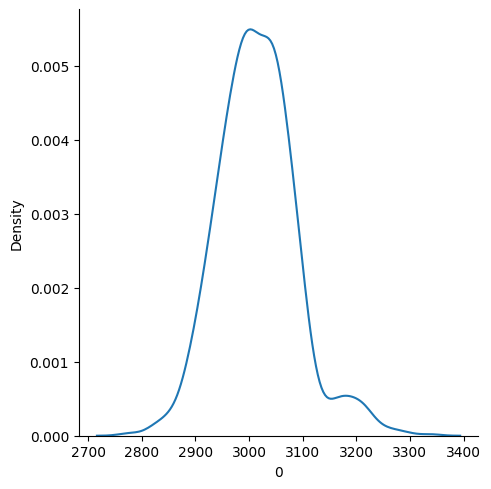

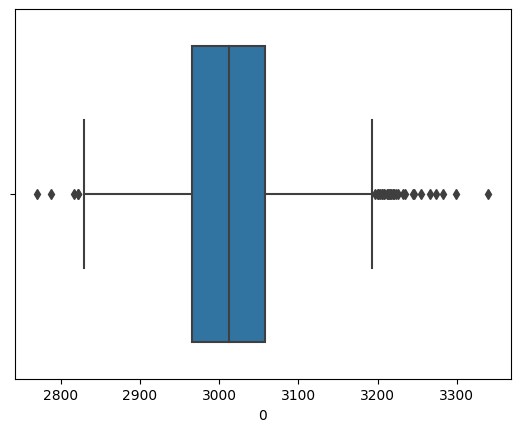

In [29]:
sns.displot(data=X_train, x='0', kind='kde')
plt.show()
sns.boxplot(data=X_train, x='0')
plt.show()

For column 0, We see bit of right skewed distribution and also lot of outliers on the higher side

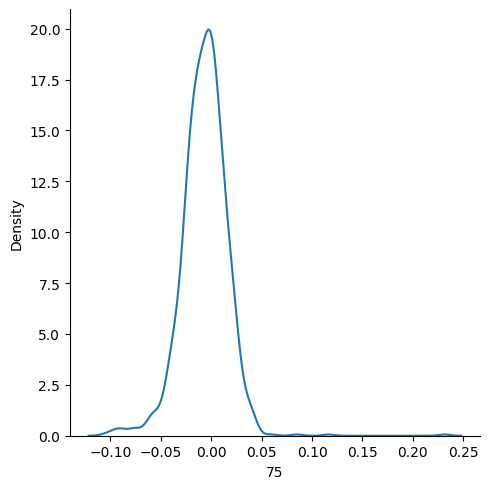

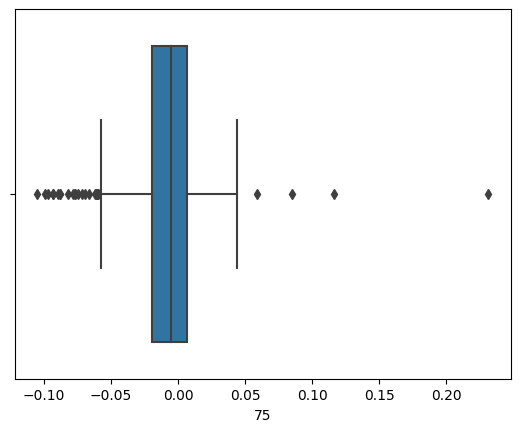

In [30]:
sns.displot(data=X_train, x='75', kind='kde')
plt.show()
sns.boxplot(data=X_train, x='75')
plt.show()

For column 75, We see right skewed distribution and also lot of outliers on the lower side

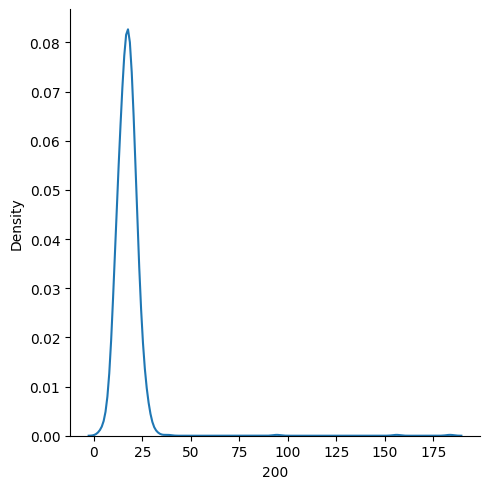

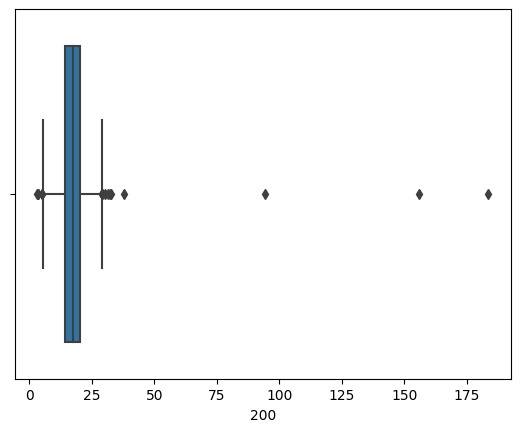

In [31]:
sns.displot(data=X_train, x='200', kind='kde')
plt.show()
sns.boxplot(data=X_train, x='200')
plt.show()

For column 200, We see right skewed distribution and also lot of outliers on the higher side

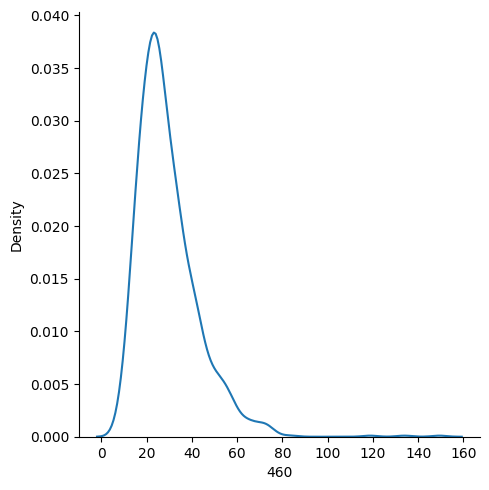

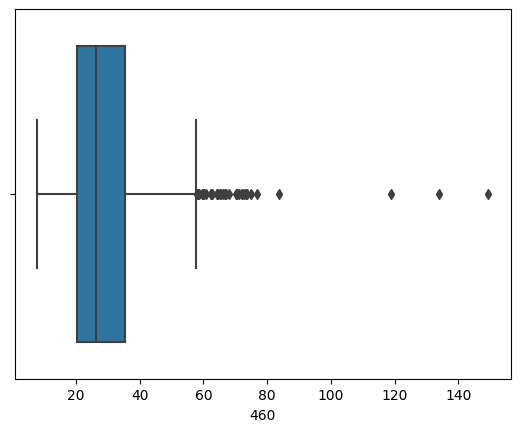

In [32]:
sns.displot(data=X_train, x='460', kind='kde')
plt.show()
sns.boxplot(data=X_train, x='460')
plt.show()

For column 460, We see right skewed distribution and  lot of outliers on the higher side

Q3 B - Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

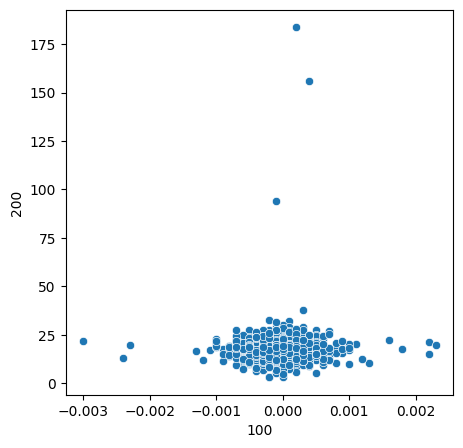

In [179]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=X_train, x='100', y='200')
plt.show()

Here we see most of the distribution in center of the plot where mostly variance in value of y is spread vertically for each value of x. That means lot of data in y column is in certain range for each x value. However, the progress is in positive direction i.e. moving forward as x increases

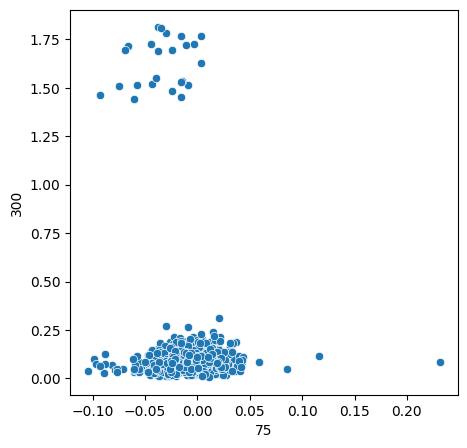

In [178]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=X_train, x='75', y='300')
plt.show()


We see data concentrated at the lower end either for less values of y or higher. The distribution is extreme.

Q4 A - Segregate predictors vs target attributes.

Here, 'Pass/Fail' column is the target attribute and other columns are Predictors

Q4 B - Check for target balancing and fix it if found imbalanced.

In [34]:
# undersampling

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_rus,y_rus = rus.fit_resample(X,Y)

In [35]:
print('x_rus shape: ',x_rus.shape)
print('y_rus shape: ', y_rus.shape)

x_rus shape:  (208, 474)
y_rus shape:  (208, 1)


In [36]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.25, random_state=100)

print("Number of records after splitting X train: ", X_train_rus.shape)
print("Number of records after splitting X test: ", X_test_rus.shape)
print("Number of records after splitting y train: ", y_train_rus.shape)
print("Number of records after splitting y test: ", y_test_rus.shape)

Number of records after splitting X train:  (156, 474)
Number of records after splitting X test:  (52, 474)
Number of records after splitting y train:  (156, 1)
Number of records after splitting y test:  (52, 1)


In [37]:
from sklearn.preprocessing import MinMaxScaler
#Scaling has been applied as dataset has negative values which Naive Bayes could not handle
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(X_train_rus,y_train_rus.values.ravel())
y_pred_rus = p.predict(X_test_rus)

In [38]:
from sklearn.metrics import accuracy_score
print("accuracy score: ", accuracy_score(y_pred_rus, y_test_rus))

accuracy score:  0.5192307692307693


In [39]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
x_smk, y_smk = smk.fit_resample(X,Y)

In [40]:
X_train_smk, X_test_smk, y_train_smk, y_test_smk = train_test_split(x_smk, y_smk, test_size=0.25, random_state=100)

print("Number of records after splitting X train: ", X_train_smk.shape)
print("Number of records after splitting X test: ", X_test_smk.shape)
print("Number of records after splitting y train: ", y_train_smk.shape)
print("Number of records after splitting y test: ", y_test_smk.shape)

Number of records after splitting X train:  (2188, 474)
Number of records after splitting X test:  (730, 474)
Number of records after splitting y train:  (2188, 1)
Number of records after splitting y test:  (730, 1)


In [41]:
p_smk = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p_smk.fit(X_train_smk,y_train_smk.values.ravel())
y_pred_smk = p_smk.predict(X_test_smk)

print("accuracy score: ", accuracy_score(y_pred_smk, y_test_smk))

accuracy score:  0.7465753424657534


Q4 C - Perform train-test split and standardise the data or vice versa if required.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

In [43]:
scaler = StandardScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

normalized_x_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

LR = LogisticRegression(C=0.01,solver='liblinear').fit(normalized_x_train, y_train)

y_test_pred = LR.predict(normalized_x_test)

accuracy = LR.score(X_test, y_test_pred)
print ("accuracy: ", accuracy)

accuracy:  0.9897959183673469


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Q4 D - Check if the train and test data have similar statistical characteristics when compared with original data

In [165]:
# printing Statistics of original data
print("Statistics of original data")
df_signal.describe()


Statistics of original data


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.000000,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.000000,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.000000,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.000000,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.000000,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.000000,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.000000,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [174]:
##min_periods = 10 is to compute the covariance of 10 columns
df_signal.cov(min_periods=10)

<ipython-input-174-4da15739775b>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_signal.cov(min_periods=10)


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,5420.167484,-854.981620,10.404778,-249.233421,-45.996191,0.000000,1.049378,0.020871,-0.287002,0.010092,...,-175.380648,0.000056,0.029730,0.005465,6.227703,0.016818,-0.016819,-0.005959,28.918571,-0.923553
1,-854.981620,6465.399020,13.772489,-270.334386,-7.456332,0.000000,-12.908305,-0.008719,0.186258,0.029213,...,605.770544,0.011953,0.004022,-0.000379,0.655531,-0.009368,0.012260,0.002339,339.075183,-0.104456
2,10.404778,13.772489,871.026144,3896.827106,159.488156,0.000000,-25.076275,-0.038803,0.051577,0.007250,...,-29.064713,-0.000608,0.007997,0.002011,1.671424,-0.009344,-0.007665,-0.002620,-91.577646,-0.014131
3,-249.233421,-270.334386,3896.827106,195091.505178,-1455.749849,0.000000,-1889.425493,0.293140,-3.375654,0.457740,...,-4387.560318,0.013581,0.193949,0.040845,41.319276,0.190383,-0.152967,-0.042813,-3347.911388,-5.440593
4,-45.996191,-7.456332,159.488156,-1455.749849,3175.946899,0.000000,-26.140403,-0.175559,-0.108608,0.046415,...,691.797489,0.008691,-0.001264,-0.000336,-0.327434,-0.030742,-0.015463,-0.004237,270.682319,-0.387803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.016818,-0.009368,-0.009344,0.190383,-0.030742,0.000000,-0.003192,0.000006,0.000010,0.000006,...,-0.488065,-0.000001,0.000000,0.000000,0.000121,0.000153,0.000018,0.000006,-0.564570,0.000026
587,-0.016819,0.012260,-0.007665,-0.152967,-0.015463,0.000000,0.001878,-0.000002,0.000015,0.000008,...,0.334422,-0.000001,-0.000000,-0.000000,-0.000092,0.000018,0.000078,0.000025,0.323185,0.000155
588,-0.005959,0.002339,-0.002620,-0.042813,-0.004237,0.000000,0.000579,-0.000001,0.000006,0.000003,...,0.103404,-0.000000,-0.000000,-0.000000,-0.000026,0.000006,0.000025,0.000008,0.104774,0.000045
589,28.918571,339.075183,-91.577646,-3347.911388,270.682319,0.000000,25.761123,-0.090996,-0.158137,0.006932,...,7659.919530,0.013269,-0.004855,-0.001152,-1.277462,-0.564570,0.323185,0.104774,8815.692532,-0.124113


In [166]:
# printing Statistics of trained data
print("Statistics of trained data")
X_train.describe()

Statistics of trained data


,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,...,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,3014.953796,2496.671047,2200.901546,1397.931986,3.247264,101.186898,0.121930,1.462038,-0.000311,0.000337,...,0.002107,97.813875,0.500079,0.015551,0.003894,3.119179,0.021445,0.016590,0.005326,98.838780
std,73.769456,79.683059,28.992582,435.655301,45.858620,6.422462,0.007583,0.074281,0.015267,0.009202,...,0.003344,53.686120,0.003397,0.019649,0.004264,4.094661,0.012064,0.009060,0.002964,91.365847
min,2770.400000,2158.750000,2060.660000,711.025800,0.681500,82.131100,0.000000,1.191000,-0.047200,-0.034900,...,0.000000,0.000000,0.477800,0.000000,0.000000,1.197500,-0.016900,0.000000,0.000000,0.000000
25%,2965.490000,2454.590000,2182.411100,1084.377900,1.020300,98.078300,0.121100,1.411400,-0.010450,-0.005350,...,0.000000,93.657100,0.497900,0.011500,0.003100,2.301950,0.013800,0.010600,0.003300,44.235500
50%,3012.410000,2500.250000,2201.577700,1295.288300,1.315000,101.512200,0.122400,1.460300,-0.000900,0.000700,...,0.000000,97.900000,0.500200,0.013700,0.003600,2.760200,0.020300,0.014800,0.004600,72.646900
75%,3057.525000,2538.650000,2217.961100,1590.169900,1.529600,104.558350,0.123800,1.516550,0.009050,0.006100,...,0.003850,97.900000,0.502300,0.016600,0.004100,3.309000,0.027600,0.020400,0.006400,114.749700
max,3339.930000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.653900,0.074900,0.053000,...,0.028600,706.824000,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [175]:
##min_periods = 10 is to compute the covariance of 10 columns
X_train.cov(min_periods=10)

,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
0,5441.932697,-932.005105,-7.154685,-461.678486,-72.928431,1.908704,0.009426,-0.369346,0.031479,0.017662,...,-0.024779,-154.746178,0.002533,0.047630,0.009446,9.595689,0.036733,-0.031552,-0.011005,-200.710661
1,-932.005105,6349.389939,5.403201,-686.743875,38.984238,-6.614332,-0.015647,0.181626,0.044618,-0.014444,...,0.013992,211.316399,0.012619,-0.001119,-0.001450,-0.290793,-0.034746,-0.002594,-0.001509,289.526060
2,-7.154685,5.403201,840.569793,3754.017621,88.319837,-23.503470,-0.033573,0.086749,0.008574,0.015108,...,0.003456,-22.294324,-0.000345,0.010173,0.002402,2.143831,-0.019854,-0.012434,-0.004253,-108.032355
3,-461.678486,-686.743875,3754.017621,189795.541611,-240.690083,-1920.060432,0.193676,-2.549038,0.558774,0.293902,...,0.028553,-863.846108,0.006534,0.253648,0.052671,53.539636,0.060780,-0.170661,-0.048845,-2642.014869
4,-72.928431,38.984238,88.319837,-240.690083,2103.013027,-8.465721,-0.137474,-0.098921,0.047808,-0.010013,...,0.001132,-40.303092,0.005593,-0.001218,0.000035,-0.303508,-0.010555,-0.015817,-0.004962,-43.401113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,9.595689,-0.290793,2.143831,53.539636,-0.303508,-1.183672,0.000054,0.006913,-0.002417,0.001631,...,0.000050,0.054787,-0.003334,0.080429,0.017392,16.766245,0.000192,-0.000202,-0.000046,-1.287362
586,0.036733,-0.034746,-0.019854,0.060780,-0.010555,-0.002610,0.000003,0.000020,0.000009,0.000002,...,0.000004,-0.177323,-0.000001,0.000001,0.000000,0.000192,0.000146,0.000018,0.000006,-0.531577
587,-0.031552,-0.002594,-0.012434,-0.170661,-0.015817,0.001893,-0.000001,0.000022,0.000008,0.000004,...,0.000013,0.139058,-0.000001,-0.000001,-0.000000,-0.000202,0.000018,0.000082,0.000026,0.332789
588,-0.011005,-0.001509,-0.004253,-0.048845,-0.004962,0.000546,-0.000000,0.000008,0.000003,0.000001,...,0.000004,0.043671,-0.000000,-0.000000,-0.000000,-0.000046,0.000006,0.000026,0.000009,0.106974


In [167]:
# printing Statistics of test data
print("Statistics of test data")
X_test.describe()

Statistics of test data


,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,...,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3012.952194,2493.390765,2199.483845,1391.715355,7.043945,100.890667,0.120996,1.465519,-0.002424,-0.000429,...,0.002193,98.212344,0.500147,0.014579,0.003693,2.913981,0.021444,0.016087,0.005143,102.161881
std,72.680759,81.892738,30.528712,452.191850,79.253151,5.522850,0.012546,0.072620,0.014519,0.009561,...,0.003100,58.594405,0.003427,0.004689,0.000906,0.932073,0.013246,0.008032,0.002563,101.056970
min,2743.240000,2221.100000,2060.660000,0.000000,0.681500,82.246700,0.000000,1.289500,-0.053400,-0.032900,...,0.000000,0.000000,0.491200,0.006500,0.002000,1.284500,-0.004700,0.004200,0.001200,0.000000
25%,2971.025000,2448.105000,2180.377800,1069.080625,0.997800,97.810000,0.120900,1.410825,-0.011300,-0.005925,...,0.000000,86.558550,0.497900,0.011700,0.003100,2.338725,0.012300,0.010500,0.003400,45.385625
50%,3010.280000,2491.740000,2200.200000,1276.475450,1.323050,101.397200,0.122200,1.468000,-0.002400,-0.000450,...,0.000000,97.900000,0.500100,0.013800,0.003600,2.753200,0.021200,0.014100,0.004500,70.784800
75%,3052.197500,2538.752500,2218.055500,1590.192350,1.529100,104.521100,0.123800,1.517375,0.005500,0.005600,...,0.004000,97.900000,0.502400,0.016300,0.004100,3.256825,0.027525,0.019725,0.006225,113.805450
max,3356.350000,2815.310000,2315.266700,3619.739700,1112.472800,119.901100,0.126900,1.656400,0.049500,0.039600,...,0.015000,737.304800,0.509800,0.047100,0.009600,9.295300,0.102800,0.055600,0.017300,737.304800


In [176]:
#min_periods = 10 is to compute the covariance of 10 columns
X_test.cov(min_periods=10)

,0,1,2,3,4,6,7,8,9,10,...,580,581,582,583,584,585,586,587,588,589
0,5282.492756,-602.683383,60.524023,391.639589,42.824491,-2.014813,0.066011,-0.039393,-0.057710,-0.036348,...,-0.014659,188.013777,-0.007254,-0.021898,-0.005862,-4.297493,-0.044150,0.026223,0.008787,722.922511
1,-602.683383,6706.420619,34.649729,977.334626,-137.172662,-31.897973,-0.019345,0.189643,-0.023199,0.070344,...,0.013259,319.977039,0.009902,0.015212,0.001900,2.982654,0.063257,0.052520,0.012477,489.912885
2,60.524023,34.649729,932.002282,4189.433246,371.918834,-29.280665,-0.054559,-0.052236,0.000734,0.030278,...,0.005376,21.882595,-0.001307,-0.000145,0.000479,-0.025316,0.023255,0.006934,0.002354,-35.403020
3,391.639589,977.334626,4189.433246,204477.469403,-5037.892401,-1736.006970,0.618431,-5.594892,0.129820,-0.070008,...,0.084468,-4301.609158,0.034617,0.010806,0.004840,2.171662,0.571888,-0.097336,-0.024219,-5331.970605
4,42.824491,-137.172662,371.918834,-5037.892401,6281.062015,-77.495039,-0.406251,-0.144026,0.046468,0.018739,...,0.015284,1208.458767,0.017485,0.001516,-0.000839,0.197924,-0.090094,-0.012292,-0.001350,1194.560054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,-4.297493,2.982654,-0.025316,2.171662,0.197924,-0.006284,0.000565,-0.001199,-0.000881,0.000235,...,0.000233,-0.471275,0.000399,0.004369,0.000782,0.868761,-0.000052,0.000187,0.000016,-0.737448
586,-0.044150,0.063257,0.023255,0.571888,-0.090094,-0.004631,0.000019,-0.000026,-0.000004,-0.000006,...,0.000005,-0.237737,0.000000,-0.000000,-0.000000,-0.000052,0.000175,0.000019,0.000005,-0.663634
587,0.026223,0.052520,0.006934,-0.097336,-0.012292,0.001802,-0.000004,-0.000007,0.000006,0.000004,...,0.000010,0.110360,-0.000001,0.000001,0.000000,0.000187,0.000019,0.000065,0.000020,0.295605
588,0.008787,0.012477,0.002354,-0.024219,-0.001350,0.000663,-0.000002,-0.000002,0.000002,0.000001,...,0.000003,0.032108,-0.000000,0.000000,-0.000000,0.000016,0.000005,0.000020,0.000007,0.098624


The percentile values remain same in all sets - original, train and test data

Q5 A - Use any Supervised Learning technique to train a model.

In [126]:
logreg = LogisticRegression(solver = 'liblinear', multi_class= 'auto')

logreg.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='liblinear')

In [45]:
lr_score = logreg.score(X_test, y_test)
print(f"Score : {lr_score}")

Score : 0.9081632653061225


In [46]:
pred = logreg.predict(X_test)

In [47]:
accuracy = logreg.score(X_test, pred)
print ("accuracy: ", accuracy)

accuracy:  1.0


Q5 B - Use cross validation techniques.

In [48]:
num_folds=10

In [49]:
scaler = StandardScaler()
normalized_x = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [50]:
kfold=KFold(n_splits=num_folds, random_state=None)
model=LogisticRegression(C=0.01,solver='saga', max_iter=1500)
results=cross_val_score(model, normalized_x, Y.values.ravel(), cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" %(results.mean()*100.0, results.std()*100.0))

[0.84076433 0.84713376 0.9044586  0.94904459 0.98089172 0.94267516
 0.98089172 0.93589744 0.91666667 0.98076923]
Accuracy: 92.792% (4.892%)


Q5 C - Apply hyper-parameter tuning techniques to get the best accuracy.

In [51]:
model.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [124]:
param_grid = {'C': [0.1, 1, 10, 100],
             'max_iter': [1000]}

gs=GridSearchCV(model, param_grid,refit=True, verbose=3,cv=10)

In [125]:
gs.fit(normalized_x, Y.values.ravel())

Fitting 10 folds for each of 4 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/10] END .............C=0.1, max_iter=1000;, score=0.490 total time=  11.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/10] END .............C=0.1, max_iter=1000;, score=0.847 total time=  10.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/10] END .............C=0.1, max_iter=1000;, score=0.892 total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/10] END .............C=0.1, max_iter=1000;, score=0.904 total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/10] END .............C=0.1, max_iter=1000;, score=0.911 total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 6/10] END .............C=0.1, max_iter=1000;, score=0.917 total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 7/10] END .............C=0.1, max_iter=1000;, score=0.892 total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 8/10] END .............C=0.1, max_iter=1000;, score=0.872 total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 9/10] END .............C=0.1, max_iter=1000;, score=0.923 total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 10/10] END ............C=0.1, max_iter=1000;, score=0.929 total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/10] END ...............C=1, max_iter=1000;, score=0.446 total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/10] END ...............C=1, max_iter=1000;, score=0.809 total time=  12.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/10] END ...............C=1, max_iter=1000;, score=0.885 total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/10] END ...............C=1, max_iter=1000;, score=0.885 total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/10] END ...............C=1, max_iter=1000;, score=0.904 total time=  13.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 6/10] END ...............C=1, max_iter=1000;, score=0.892 total time=  12.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 7/10] END ...............C=1, max_iter=1000;, score=0.879 total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 8/10] END ...............C=1, max_iter=1000;, score=0.853 total time=  12.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 9/10] END ...............C=1, max_iter=1000;, score=0.923 total time=  16.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 10/10] END ..............C=1, max_iter=1000;, score=0.897 total time=  14.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/10] END ..............C=10, max_iter=1000;, score=0.433 total time=  14.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/10] END ..............C=10, max_iter=1000;, score=0.777 total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/10] END ..............C=10, max_iter=1000;, score=0.885 total time=  13.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/10] END ..............C=10, max_iter=1000;, score=0.892 total time=  13.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/10] END ..............C=10, max_iter=1000;, score=0.898 total time=  11.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 6/10] END ..............C=10, max_iter=1000;, score=0.892 total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 7/10] END ..............C=10, max_iter=1000;, score=0.879 total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 8/10] END ..............C=10, max_iter=1000;, score=0.853 total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 9/10] END ..............C=10, max_iter=1000;, score=0.923 total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 10/10] END .............C=10, max_iter=1000;, score=0.878 total time=  10.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/10] END .............C=100, max_iter=1000;, score=0.433 total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/10] END .............C=100, max_iter=1000;, score=0.777 total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/10] END .............C=100, max_iter=1000;, score=0.885 total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/10] END .............C=100, max_iter=1000;, score=0.892 total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/10] END .............C=100, max_iter=1000;, score=0.898 total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 6/10] END .............C=100, max_iter=1000;, score=0.892 total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 7/10] END .............C=100, max_iter=1000;, score=0.879 total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 8/10] END .............C=100, max_iter=1000;, score=0.853 total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 9/10] END .............C=100, max_iter=1000;, score=0.923 total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 10/10] END ............C=100, max_iter=1000;, score=0.878 total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=10,
             estimator=LogisticRegression(C=0.01, max_iter=1500, solver='saga'),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [1000]},
             verbose=3)

In [131]:
print(gs.best_params_)

{'C': 0.1, 'max_iter': 1000}


In [55]:
print(gs.best_estimator_)

LogisticRegression(C=0.1, max_iter=400, solver='saga')


In [56]:
gs.cv_results_['params']

[{'C': 0.1, 'max_iter': 400},
 {'C': 1, 'max_iter': 400},
 {'C': 10, 'max_iter': 400},
 {'C': 100, 'max_iter': 400}]

In [57]:
gs.cv_results_['mean_test_score']

array([0.85140862, 0.83610975, 0.8316389 , 0.8316389 ])

Q5 D - Use any other technique/method which can enhance the model performance.

In [58]:
# using pca
covMatrix = np.cov(normalized_x, rowvar=False)
pd.DataFrame(covMatrix)

,0,1,2,3,4,5,6,7,8,9,...,464,465,466,467,468,469,470,471,472,473
0,1.000639,-0.143930,0.004765,-0.007618,-0.011021,0.002279,0.035817,-0.053105,0.009000,0.006523,...,-0.092342,-0.017158,0.000249,0.024261,0.020839,0.023596,0.018187,-0.026137,-0.028418,0.004176
1,-0.143930,1.000639,0.005763,-0.007573,-0.001637,-0.025592,-0.021942,0.030627,0.023908,0.009670,...,0.052212,0.054050,0.043576,0.002583,-0.001638,0.002277,-0.010342,0.016242,0.009112,0.044824
2,0.004765,0.005763,1.000639,0.299126,0.095952,-0.136312,-0.144464,0.023546,0.016171,0.069937,...,0.040554,-0.007040,-0.006035,0.015561,0.018066,0.015763,-0.025001,-0.028810,-0.030292,-0.032915
3,-0.007618,-0.007573,0.299126,1.000639,-0.058521,-0.686273,0.075307,-0.102041,0.068358,0.049876,...,0.029379,-0.071336,0.009001,0.025697,0.025035,0.026033,0.034662,-0.039153,-0.033670,-0.080392
4,-0.011021,-0.001637,0.095952,-0.058521,1.000639,-0.074415,-0.402706,-0.025992,0.054237,-0.006473,...,0.025669,0.088243,0.045111,-0.001274,-0.001567,-0.001617,-0.043859,-0.030929,-0.026029,0.050943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0.023596,0.002277,0.015763,0.026033,-0.001617,-0.039536,0.006708,0.017988,-0.036118,0.039457,...,0.007884,-0.000468,-0.197489,1.000269,0.995632,1.000639,0.002962,-0.002699,-0.002303,-0.003807
470,0.018187,-0.010342,-0.025001,0.034662,-0.043859,-0.040567,0.059805,0.009565,0.032443,0.000759,...,0.097598,-0.283238,-0.016855,0.002392,0.001603,0.002962,1.000639,0.169742,0.166048,-0.486402
471,-0.026137,0.016242,-0.028810,-0.039153,-0.030929,0.034683,-0.019148,0.021925,0.057893,0.047408,...,0.425961,0.272284,-0.024584,-0.001810,-0.001697,-0.002699,0.169742,1.000639,0.974954,0.390626
472,-0.028418,0.009112,-0.030292,-0.033670,-0.026029,0.032875,-0.020727,0.025236,0.059359,0.046488,...,0.432484,0.258640,-0.020818,-0.001446,-0.001182,-0.002303,0.166048,0.974954,1.000639,0.389038


In [59]:
e_vals, e_vecs =np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s' ,  e_vecs)
print('\nEigen Values \n%s' ,  e_vals)

Eigen Vectors 
%s [[-5.93901079e-03 -2.51383961e-02  8.03718573e-03 ... -1.02668459e-13
  -1.12873300e-13  1.37453760e-13]
 [-1.72265395e-05  1.22049369e-02  5.67573858e-03 ... -3.64823269e-14
  -5.17463232e-14 -1.81889394e-13]
 [-3.87681585e-03  8.25482782e-03  1.15569258e-02 ... -5.43458467e-13
  -2.87426379e-13  3.19120995e-12]
 ...
 [-3.68588164e-04  2.20435463e-02  2.91727631e-03 ...  8.08877019e-14
   7.80456280e-14  1.77471263e-12]
 [-1.00407289e-04  1.83530294e-02  2.30357428e-03 ... -1.14946571e-13
  -1.19665043e-13 -1.05509512e-12]
 [ 1.51298977e-02  1.69721903e-02  1.02068381e-02 ...  7.06155075e-14
   7.87869949e-14  1.53236898e-13]]

Eigen Values 
%s [ 2.63684067e+01  1.75485971e+01  1.36846018e+01  1.22754043e+01
  1.00524375e+01  9.72969560e+00  9.29269581e+00  8.73318752e+00
  8.50995983e+00  7.74018207e+00  6.96586799e+00  6.35141377e+00
  6.22801553e+00  6.06071138e+00  5.99557616e+00  5.62002840e+00
  5.44098515e+00  5.41400615e+00  5.27310961e+00  5.00886041e+00
  4

In [60]:
pca = PCA(n_components=10)
pca.fit(normalized_x)

PCA(n_components=10)

In [61]:
pca.explained_variance_

array([26.36840667, 17.54859707, 13.68459936, 12.27539258, 10.05235973,
        9.72934595,  9.2923443 ,  8.73273372,  8.50881499,  7.73476932])

In [62]:
k=1
total = []
for i in pca.explained_variance_ratio_*100:
  print('Variance explained by Principle component', k, 'is:{:.2f}%'.format(i))
  k+=1
  total.append(i)

print('\n Total variance exlained by all the principle components: ', sum(total), '%')

Variance explained by Principle component 1 is:5.56%
Variance explained by Principle component 2 is:3.70%
Variance explained by Principle component 3 is:2.89%
Variance explained by Principle component 4 is:2.59%
Variance explained by Principle component 5 is:2.12%
Variance explained by Principle component 6 is:2.05%
Variance explained by Principle component 7 is:1.96%
Variance explained by Principle component 8 is:1.84%
Variance explained by Principle component 9 is:1.79%
Variance explained by Principle component 10 is:1.63%

 Total variance exlained by all the principle components:  26.12832867884678 %


In [63]:
#cumulative variance explained
tot = sum(e_vals)
var_exp = [(i/tot)*100 for i in sorted (e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative variance explained", cum_var_exp)

Cumulative variance explained [  5.55940493   9.25927798  12.14448237  14.73257744  16.85199146
  18.90335992  20.86259316  22.703862    24.49806646  26.12997417
  27.59862874  28.93773434  30.25082317  31.52863829  32.79272057
  33.97762392  35.12477855  36.26624503  37.37800548  38.43405272
  39.46031567  40.47059638  41.44868839  42.39947535  43.34892839
  44.2919093   45.19937638  46.07094348  46.93765629  47.78090228
  48.60760135  49.42805175  50.2175182   51.00184525  51.76818147
  52.52127695  53.26862979  53.99336594  54.71116554  55.42511267
  56.11738436  56.80391605  57.47584566  58.14187007  58.80169505
  59.45484712  60.08086443  60.70207401  61.31933725  61.93345711
  62.52745062  63.11258868  63.68780778  64.2546821   64.81390515
  65.36756905  65.91128292  66.44879336  66.98200156  67.49817844
  68.00585922  68.51014604  69.01050064  69.49904097  69.98266573
  70.45432696  70.91722334  71.37204893  71.82082465  72.26394878
  72.70333049  73.13771076  73.56699449  73.99

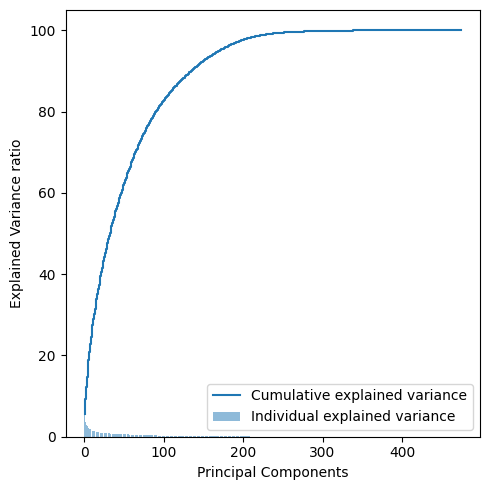

In [123]:
# plotting cumulative variance explained with number of components

plt.figure(figsize=(5,5))
plt.bar(range(1, e_vals.size +1), var_exp, alpha = 0.5, align = 'center', label='Individual explained variance')
plt.step(range(1,e_vals.size + 1), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Q5 E - Display and explain the classification report in detail.

In [65]:
pca250 = PCA(n_components=250)
pca250.fit(normalized_x)

PCA(n_components=250)

In [66]:
Xpca250=pca250.transform(normalized_x)

X_train_pca, X_test_pca, y_train_pca, y_test_pca =train_test_split(Xpca250, Y, test_size=0.20, random_state=100)
model.fit(X_train_pca, y_train_pca)
y_pred_pca=model.predict(X_test_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
print("Accuracy score of test data after PCA: ", metrics.accuracy_score(y_test_pca, y_pred_pca))

Accuracy score of test data after PCA:  0.9299363057324841


In [68]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(y_train_pca.shape)
print(y_test_pca.shape)
print(y_pred_pca.shape)

(1253, 250)
(314, 250)
(1253, 1)
(314, 1)
(314,)


In [121]:
print(metrics.classification_report(y_test_pca,y_pred_pca, labels=[1,0], zero_division=0))

              precision    recall  f1-score   support

           1       0.33      0.05      0.08        21
           0       0.00      0.00      0.00         0

   micro avg       0.33      0.05      0.08        21
   macro avg       0.17      0.02      0.04        21
weighted avg       0.33      0.05      0.08        21



Q5 F - Apply the above steps for all possible models that you have learnt so far.

KNN, Decision Tree, Naive Bayes, Random forest, SVM

KNN technique

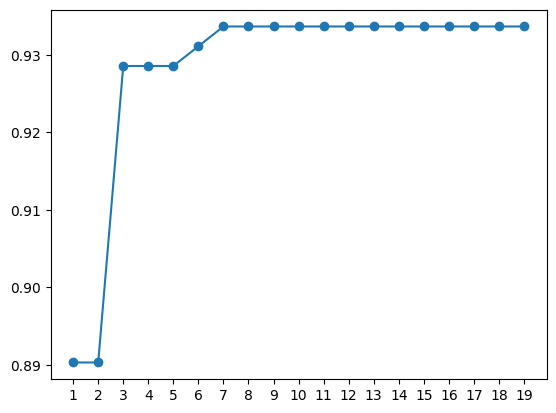

In [70]:
#knn model

kscores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i, weights='distance')
    knn.fit(normalized_x_train, y_train.values.ravel())
    s = knn.score(normalized_x_test, y_test.values.ravel())
    kscores.append(s)
plt.plot(range(1,20), kscores, 'o-')
plt.xticks(range(1,20))
plt.show()

In [112]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(normalized_x_train, y_train)

knn_test_score = knn.score(normalized_x_test, y_test)
print(f"KNN Test Score/ Accuracy : {knn_test_score}")

knn_train_score = knn.score(normalized_x_train, y_train)
print(f"KNN Train Score : {knn_train_score}")

y_pred_knn=knn.predict(normalized_x_test)
print(metrics.classification_report(y_test,y_pred_knn))


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Test Score/ Accuracy : 0.9336734693877551
KNN Train Score : 0.934468085106383
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB Gaussian

In [115]:
#NB Gaussian

nb = GaussianNB()
nb.fit(normalized_x_train, y_train.values.ravel())

nb_test_score = nb.score(normalized_x_test, y_test)
print(f"NB Test Score : {nb_test_score}")

nb_train_score = nb.score(normalized_x_train, y_train)
print(f"NB Train Score : {nb_train_score}")

pred = nb.predict(normalized_x_test)

nb_test_accuracy = nb.score(normalized_x_test, pred)
print ("NB test accuracy: ", nb_test_accuracy)

y_pred_nb=nb.predict(normalized_x_test)
print(metrics.classification_report(y_test,y_pred_nb,zero_division=0))

NB Test Score : 0.1989795918367347
NB Train Score : 0.21361702127659574
NB test accuracy:  1.0
              precision    recall  f1-score   support

          -1       0.93      0.15      0.26       366
           1       0.07      0.85      0.12        26

    accuracy                           0.20       392
   macro avg       0.50      0.50      0.19       392
weighted avg       0.88      0.20      0.25       392



In [114]:
#Random Forest

rf = RandomForestClassifier(n_estimators=20,criterion='gini', max_depth=8, max_leaf_nodes=2)
rf.fit(normalized_x_train, y_train.values.ravel())

rf_test_score = rf.score(normalized_x_test, y_test)
print(f"Random Forest Test Score/ Accuracy : {rf_test_score}")

rf_train_score = rf.score(normalized_x_train, y_train)
print(f"Random Forest Train Score : {rf_train_score}")

y_pred_rf=rf.predict(normalized_x_test)

print(metrics.classification_report(y_test,y_pred_rf,zero_division=0))

Random Forest Test Score/ Accuracy : 0.9336734693877551
Random Forest Train Score : 0.9336170212765957
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



In [116]:
#Decision Tree Model

dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=2)
dtc.fit(normalized_x_train, y_train.values.ravel())

dtc_test_score = dtc.score(normalized_x_test, y_test)
print(f"Decision Tree Test Score/ Accuracy : {dtc_test_score}")

dtc_train_score = dtc.score(normalized_x_train, y_train)
print(f"Decision Tree Train Score : {dtc_train_score}")

y_pred_dtc=dtc.predict(normalized_x_test)

print(metrics.classification_report(y_test,y_pred_dtc,zero_division=0))

Decision Tree Test Score/ Accuracy : 0.9336734693877551
Decision Tree Train Score : 0.9336170212765957
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392



Q6 A- Display and compare all the models designed with their train and test accuracies.

                      Model  Train Set Score  Test Set Score
0                       KNN         0.934468        0.933673
1             Random Forest         0.933617        0.933673
2  Decision Tree Classifier         0.933617        0.933673
3               Naive Bayes         0.213617        0.198980


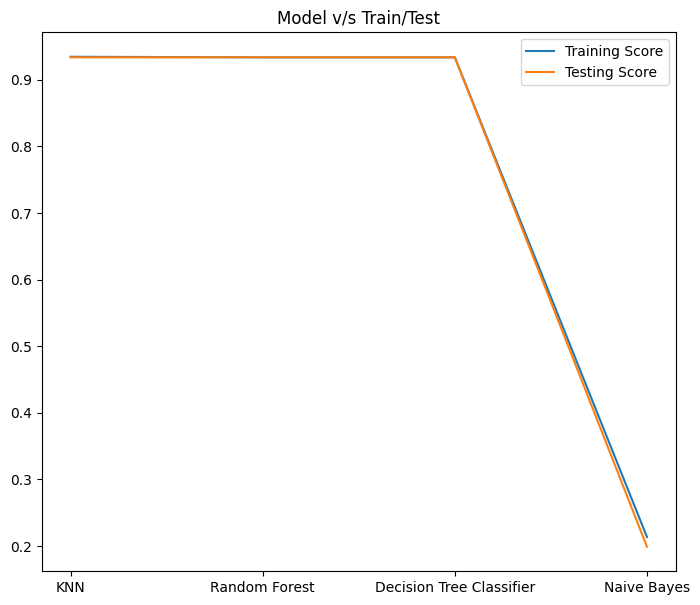

In [117]:
results = pd.DataFrame({'Model':['KNN', 'Random Forest', 'Decision Tree Classifier','Naive Bayes'],
                        'Train Set Score':[knn_train_score, rf_train_score, dtc_train_score, nb_train_score],
                        'Test Set Score': [knn_test_score, rf_test_score, dtc_test_score, nb_test_score]})

print(results)

f=plt.figure()
f.set_figwidth(18)
f.set_figheight(7)
plt.subplot(1,2,1)
plt.plot(results['Model'],results['Train Set Score'], label="Training Score");
plt.plot(results['Model'],results['Test Set Score'], label="Testing Score");
plt.title('Model v/s Train/Test')
plt.legend()
plt.show()

Q6 B - Select the final best trained model along with your detailed comments for selecting this model.

if we go by the accuracy, we can see that KNN, Random Forest and Decision Tree have given 93% accuracy which is descent and not an overfit either. Naive Bayes has performed poorly and not a contributive at all.

if we check precision and recall for these models, then KNN, Random Forest and Decision Tree have all give precision of 0.93 and recall of 1, which is a good value. However, if we see Naive Bayes, it contributes more towards precision and recall even for fail cases identification.

However, since NB's accuracy is low, one may not choose such a model but can certainly choose from other models available.

Q6 C - Write your conclusion on the results.

As the features in the dataset are huge, it is important to reduce the dimensions and then consume the data. Almost 200-250 features are contributing to 95% or more so we can drop the remaining. Scaling is important here as working on more than 200 dimensions is a complex task and to understand their relation one has to scale the data.

On application of various models, it is evident that 3 models are capable of handling this volume of data nd and provide good accuracy. There could be more models which could be applied but at the moment this 3 have proven fit.